# Question 1

We can add the number of annual holidays of a family. Other than that, living whether in a 1st world country or a 3rd can be implemented, too.

# Question 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [2]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49165 entries, 0 to 49164
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            49165 non-null  object 
 1   Summary                   49165 non-null  object 
 2   Precip Type               49165 non-null  object 
 3   Temperature (C)           49165 non-null  float64
 4   Apparent Temperature (C)  49165 non-null  float64
 5   Humidity                  49165 non-null  float64
 6   Wind Speed (km/h)         49165 non-null  float64
 7   Wind Bearing (degrees)    49165 non-null  float64
 8   Visibility (km)           49165 non-null  float64
 9   Loud Cover                49164 non-null  float64
 10  Pressure (millibars)      49164 non-null  float64
 11  Daily Summary             49164 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


# Creation the target variable

In [3]:
weather_df['Target'] = weather_df['Temperature (C)'] - weather_df['Apparent Temperature (C)']
weather_df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Target
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,2.083
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.,2.128
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.,0.000
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.,2.344
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.,1.778
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.,2.111
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.,2.211
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.,2.244
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.,0.000
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.,0.000


# Linearity

In [20]:
X = weather_df[['Humidity', 'Wind Speed (km/h)']]

Y = weather_df['Target']

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)

predictions =  lrm.predict(X)


print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [3.22611971 0.12443537]

Intercept: 
 -2.6213106343486627


In the previous model, both of the coefficients of Humidity & Wind Speed were negative, but that's not the case in here.

# Avg Error

In [21]:
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 2.1015314871090321e-16


# Homoscedasticity




In [22]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 8338.11 and p value is 0
Levene test statistic value is 6878.21 and p value is 0


# Low Collinearity

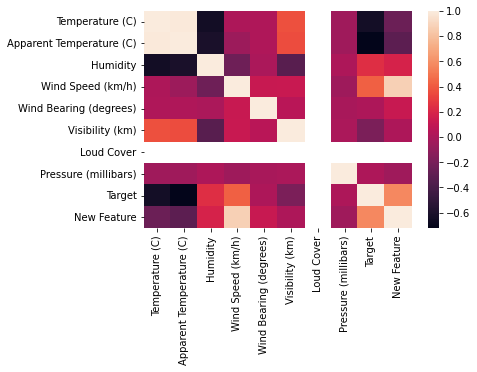

In [23]:
corr = weather_df.corr()

sns.heatmap(corr, data=weather_df)

In [24]:
#to see the correlation between the variables.
print(corr['Target'].sort_values(ascending=False))
print("---------------"*3)

Target                      1.000
New Feature                 0.573
Wind Speed (km/h)           0.423
Humidity                    0.243
Pressure (millibars)        0.015
Wind Bearing (degrees)      0.014
Visibility (km)            -0.179
Temperature (C)            -0.634
Apparent Temperature (C)   -0.724
Loud Cover                    nan
Name: Target, dtype: float64
---------------------------------------------


The only directly proportional features are the ones that we use.

# Correlation between the error values

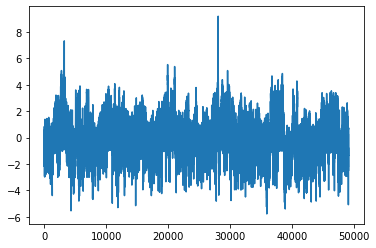

In [25]:
plt.plot(errors)
plt.show()

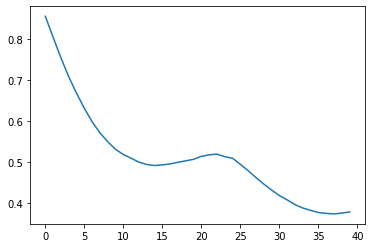

In [26]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

# Corr btwn Features & Errors

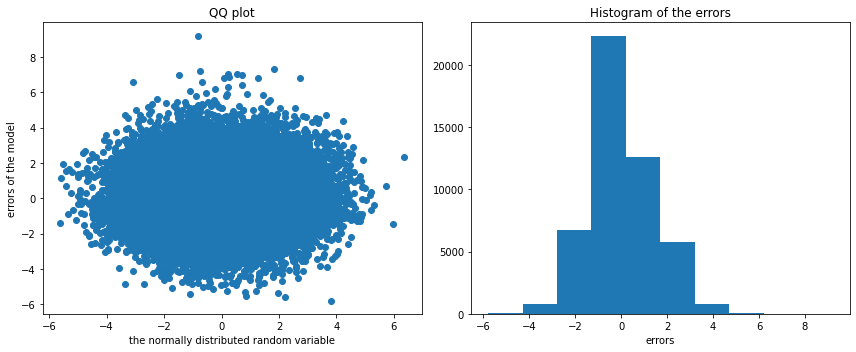

In [27]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1463.3544510166653 and p value is 0.0
Normality test statistics is 1327.135380507992 and p value is 6.549584557391258e-289


# Adding the new feature; Humidity * Wind Speed

In [29]:
weather_df['New Feature'] = weather_df['Humidity'] * weather_df['Wind Speed (km/h)']
weather_df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Target,New Feature
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,2.083,12.567
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.,2.128,12.268
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.,0.000,3.496
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.,2.344,11.706
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.,1.778,9.167
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.,2.111,11.865
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.,2.211,11.747
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.,2.244,12.595
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.,0.000,9.281
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.,0.000,9.019


# Linearity

In [30]:
X2 = weather_df[['Humidity', 'Wind Speed (km/h)', 'New Feature']]

lrm2 = linear_model.LinearRegression()

lrm2.fit(X2,Y)

predictions2 =  lrm2.predict(X2)


print('\nCoefficients: \n', lrm2.coef_)
print('\nIntercept: \n', lrm2.intercept_)


Coefficients: 
 [-0.13483318 -0.09257793  0.30811201]

Intercept: 
 -0.1561040859614573


# Avg Error

In [31]:
errors2 = Y - predictions2

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors2)))

Mean of the errors in the medical costs model is: -2.541104382407584e-16


# Homeo

In [32]:
bart_stats = bartlett(predictions2, errors2)
lev_stats = levene(predictions2, errors2)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 4200.36 and p value is 0
Levene test statistic value is 2172.5 and p value is 0


# Low Collinearity

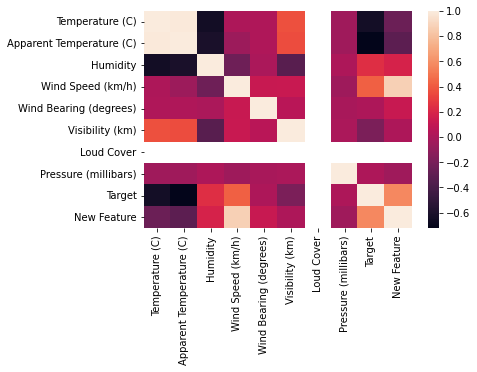

In [33]:
corr = weather_df.corr()

sns.heatmap(corr, data=weather_df)

In [34]:
corr['Target'].sort_values(ascending=False)

Target                      1.000
New Feature                 0.573
Wind Speed (km/h)           0.423
Humidity                    0.243
Pressure (millibars)        0.015
Wind Bearing (degrees)      0.014
Visibility (km)            -0.179
Temperature (C)            -0.634
Apparent Temperature (C)   -0.724
Loud Cover                    nan
Name: Target, dtype: float64

The rest is as in the previous model.

# Question 3

In [40]:
house_prices_df = pd.read_csv("train.csv")
house_prices_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd

In [41]:
# one-hot encoding of the Central Air Conditioning
house_prices_df['have_CentralAir'] = pd.get_dummies(house_prices_df.CentralAir, drop_first=True)
# this will be used in the upcoming codes

house_prices_df['OxygenLevel'] = house_prices_df.GrLivArea * house_prices_df.have_CentralAir
house_prices_df['OxygenLevel'].head(5)

0    1710
1    1262
2    1786
3    1717
4    2198
Name: OxygenLevel, dtype: int64

In [42]:
Y2 = house_prices_df['SalePrice']

X2 = house_prices_df[['GrLivArea', 'have_CentralAir', 'OxygenLevel']]

lrm2 = linear_model.LinearRegression()

lrm2.fit(X2, Y2)

print('\nCoefficients: \n', lrm2.coef_)
print('\nIntercept: \n', lrm2.intercept_)


Coefficients: 
 [    52.47339915 -15304.01819051     56.10866027]

Intercept: 
 35529.13562282489


It seems that ground above level area is the most unneccesary feature, but oxygen level is not that different than it. So, only the central air is enough?

In [43]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X2 = sm.add_constant(X2)

results = sm.OLS(Y2, X2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     583.4
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          5.79e-249
Time:                        06:04:48   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.594e+04
Df Residuals:                    1456   BIC:                         3.596e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.553e+04   1.43e+04      2.486      0.013    7491.271    6.36e+04
GrLivArea          52.4734      9.928      5.286      0.000      32.999      71.948
have_CentralAir  -1.53e+04    1.5e+04     -1.021      0.307   -4.47e+04    1.41e+04
OxygenLevel        56.1087     10.311      5.442      0.000      35.882      76.335
==============================================================================
Omnibus:                      291.092   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5065.172
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                      12.087   Cond. No.                     3.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
Y3 = house_prices_df['SalePrice']

X3 = house_prices_df[['have_CentralAir', 'OxygenLevel']]

lrm3 = linear_model.LinearRegression()

lrm3.fit(X3, Y3)

print('\nCoefficients: \n', lrm3.coef_)
print('\nIntercept: \n', lrm3.intercept_)


Coefficients: 
 [-85038.95625189    108.58205942]

Intercept: 
 105264.07368421061


The significance of the features (at least, the quantity of their coefficients) have been increased.

In [45]:
predictions3 =  lrm3.predict(house_prices_df[['have_CentralAir', 'OxygenLevel']])

In [46]:
errors3 = Y3 - predictions3

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 2.1015314871090321e-16


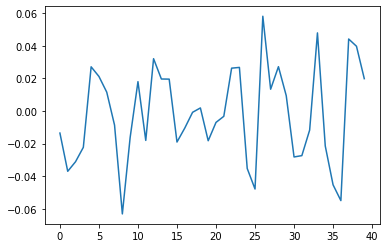

In [47]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors3)

plt.plot(acf_data[1:])
plt.show()

In [48]:
jb_stats = jarque_bera(errors3)
norm_stats = normaltest(errors3)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 4683.281568249998 and p value is 0.0
Normality test statistics is 287.85883513494014 and p value is 3.106334119296037e-63


It seems to me that, the affect of GrLivArea on SalePrice has passed to the affect of OxygenLevel on SalePrice. However, I couldn't figure out how the coefficient of have_CentralAir changed drastically.

# THE MAIN SECTION FOR THIS ASSIGNMENT

In [35]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                 1.066e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:53:19   Log-Likelihood:                -87506.
No. Observations:               49165   AIC:                         1.750e+05
Df Residuals:                   49162   BIC:                         1.750e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6213      0.030    -86.657      0.000      -2.681      -2.562
Humidity              3.2261      0.035     93.484      0.000       3.158       3.294
Wind Speed (km/h)     0.1244      0.001    131.013      0.000       0.123       0.126
==============================================================================
Omnibus:                     1327.135   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.354
Skew:                           0.392   Prob(JB):                         0.00
Kurtosis:                       3.315   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared & Adjusted R-squared values are, respectively 0.303 & 0.302.

These are pretty bad values to consider.

# Next Question

In [36]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X2 = sm.add_constant(X2)

results = sm.OLS(Y, X2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     9095.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:56:04   Log-Likelihood:                -85510.
No. Observations:               49165   AIC:                         1.710e+05
Df Residuals:                   49161   BIC:                         1.711e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1561      0.048     -3.251      0.001      -0.250      -0.062
Humidity             -0.1348      0.062     -2.183      0.029      -0.256      -0.014
Wind Speed (km/h)    -0.0926      0.003    -26.553      0.000      -0.099      -0.086
New Feature           0.3081      0.005     64.489      0.000       0.299       0.317
==============================================================================
Omnibus:                     1756.108   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3015.450
Skew:                           0.309   Prob(JB):                         0.00
Kurtosis:                       4.045   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both R-squared values have been increased by 0.050, and this tells us that our model has been improved.

# Adding Visibility to the First Model

In [38]:
X5 = weather_df[['Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]

Y = weather_df['Target']

lrm5 = linear_model.LinearRegression()

lrm5.fit(X,Y)

predictions5 =  lrm5.predict(X5)


print('\nCoefficients: \n', lrm5.coef_)
print('\nIntercept: \n', lrm5.intercept_)


Coefficients: 
 [0.         3.22611971 0.12443537]

Intercept: 
 -2.6213106343486583


In [39]:
X5 = sm.add_constant(X5)

results = sm.OLS(Y, X5).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     7708.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:58:51   Log-Likelihood:                -86886.
No. Observations:               49165   AIC:                         1.738e+05
Df Residuals:                   49161   BIC:                         1.738e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7309      0.039    -44.351      0.000      -1.807      -1.654
Humidity              2.8309      0.036     78.955      0.000       2.761       2.901
Wind Speed (km/h)     0.1262      0.001    134.392      0.000       0.124       0.128
Visibility (km)      -0.0628      0.002    -35.446      0.000      -0.066      -0.059
==============================================================================
Omnibus:                     1280.112   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1443.544
Skew:                           0.370   Prob(JB):                         0.00
Kurtosis:                       3.395   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, our R-squared values have been decreased. Fortunately, they are still better than the first model.

Since the AIC & BIC values of the 2nd model is the least, according to these values, 2nd model is the best choice among 3.

Recall that R-squared values have also told us the same.

#  EVALUATING THE GOODNESS OF FIT ON THE HOUSE PRICES

In [50]:
#All three variables are included.
X2 = sm.add_constant(X2)

results = sm.OLS(Y2, X2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     583.4
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          5.79e-249
Time:                        06:07:59   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.594e+04
Df Residuals:                    1456   BIC:                         3.596e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.553e+04   1.43e+04      2.486      0.013    7491.271    6.36e+04
GrLivArea          52.4734      9.928      5.286      0.000      32.999      71.948
have_CentralAir  -1.53e+04    1.5e+04     -1.021      0.307   -4.47e+04    1.41e+04
OxygenLevel        56.1087     10.311      5.442      0.000      35.882      76.335
==============================================================================
Omnibus:                      291.092   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5065.172
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                      12.087   Cond. No.                     3.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#Without GrLivArea
X3 = sm.add_constant(X3)

results = sm.OLS(Y2, X3).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     845.6
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          1.78e-244
Time:                        06:08:11   Log-Likelihood:                -17982.
No. Observations:                1460   AIC:                         3.597e+04
Df Residuals:                    1457   BIC:                         3.599e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.053e+05   5548.738     18.971      0.000    9.44e+04    1.16e+05
have_CentralAir -8.504e+04   7168.598    -11.863      0.000   -9.91e+04    -7.1e+04
OxygenLevel       108.5821      2.811     38.630      0.000     103.068     114.096
==============================================================================
Omnibus:                      287.859   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4683.282
Skew:                           0.431   Prob(JB):                         0.00
Kurtosis:                      11.732   Cond. No.                     9.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Their AIC & BIC results are the same, whereas the R-squared & the Adjusted R-squared values of the former model is better.

Unfortunately, I do not think that my model is satisfactory.


*   First of all, it looks like there is multicollinearity between my features.
*   Secondly, the R-squared & Adj. R-squared values are not in the range that a data scientist would want.



The model that includes 3 features seems the best among all.